In [14]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [15]:

# Read in troop data into DataFrame
df = pd.read_csv("troop_movements.csv")


In [16]:

er_counts = df.value_counts('empire_or_resistance').reset_index()
er_counts

,empire_or_resistance,count
0,empire,513
1,resistance,487


In [17]:
hw_counts = df.value_counts('homeworld').reset_index()
hw_counts

,homeworld,count
0,Shili,36
1,Mon Cala,35
2,Zolan,32
3,Ryloth,32
4,Rodia,32
5,Iridonia,31
6,Tund,29
7,Alderaan,29
8,Chandrila,29
9,Haruun Kal,28


In [18]:
unit_type_counts = df.value_counts('unit_type').reset_index()
unit_type_counts

,unit_type,count
0,stormtrooper,141
1,at-st,128
2,x-wing,127
3,tie_fighter,123
4,tie_silencer,122
5,at-at,121
6,resistance_soldier,120
7,unknown,118


In [19]:
df['is_resistance'] = [True if x == 'resistance' else False for x in df['empire_or_resistance']]
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-21 10:10:47,1,at-st,empire,1,6,10,3,Champala,False
1,2024-05-21 10:10:46,2,tie_fighter,resistance,10,1,6,2,Dathomir,True
2,2024-05-21 10:10:45,3,tie_silencer,resistance,5,10,7,1,Kalee,True
3,2024-05-21 10:10:44,4,x-wing,empire,8,8,4,3,Kashyyyk,False
4,2024-05-21 10:10:43,5,stormtrooper,resistance,4,10,1,1,Tund,True
...,...,...,...,...,...,...,...,...,...,...
995,2024-05-21 09:54:12,996,at-at,empire,8,9,3,10,Dorin,False
996,2024-05-21 09:54:11,997,x-wing,resistance,2,6,10,4,Iktotch,True
997,2024-05-21 09:54:10,998,at-at,empire,2,1,6,5,Kalee,False
998,2024-05-21 09:54:09,999,stormtrooper,empire,7,2,7,7,Mon Cala,False


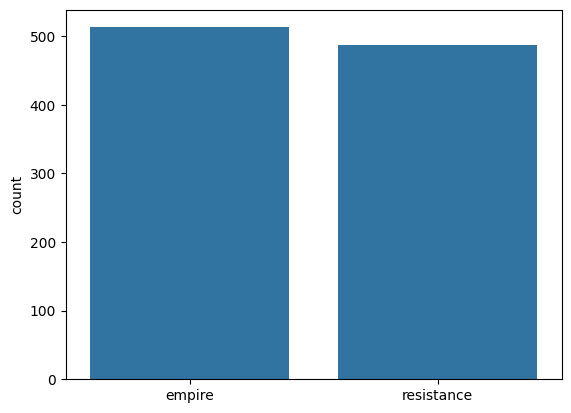

In [20]:
# Create Bar Plot
plot = sns.barplot(
    data= er_counts,
    x= ['empire', 'resistance'],
    y= 'count')

In [21]:
# Define the features and target variable

X = df[['unit_type','homeworld']]  # Features
X = pd.get_dummies(X, columns=['unit_type', 'homeworld'])
y = df['empire_or_resistance']  # Target variable
X

,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing,homeworld_Alderaan,homeworld_Aleen Minor,...,homeworld_Sullust,homeworld_Tatooine,homeworld_Tholoth,homeworld_Toydaria,homeworld_Trandosha,homeworld_Troiken,homeworld_Tund,homeworld_Umbara,homeworld_Vulpter,homeworld_Zolan
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of train and test sets
print("train_test_split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 50)
X_test shape: (200, 50)
y_train shape: (800,)
y_test shape: (200,)


In [23]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.52


In [25]:
df_dummies = pd.get_dummies(df, columns=['homeworld', 'empire_or_resistance', 'unit_type'])
print(df_dummies)

               timestamp  unit_id  location_x  location_y  destination_x  \
0    2024-05-21 10:10:47        1           1           6             10   
1    2024-05-21 10:10:46        2          10           1              6   
2    2024-05-21 10:10:45        3           5          10              7   
3    2024-05-21 10:10:44        4           8           8              4   
4    2024-05-21 10:10:43        5           4          10              1   
..                   ...      ...         ...         ...            ...   
995  2024-05-21 09:54:12      996           8           9              3   
996  2024-05-21 09:54:11      997           2           6             10   
997  2024-05-21 09:54:10      998           2           1              6   
998  2024-05-21 09:54:09      999           7           2              7   
999  2024-05-21 09:54:08     1000          10           8              4   

     destination_y  is_resistance  homeworld_Alderaan  homeworld_Aleen Minor  \
0      

In [32]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances


,Feature,Importance
0,unit_type_at-at,0.022694
1,unit_type_at-st,0.038702
2,unit_type_resistance_soldier,0.016769
3,unit_type_stormtrooper,0.101964
4,unit_type_tie_fighter,0.081711
5,unit_type_tie_silencer,0.047727
6,unit_type_unknown,0.052169
7,unit_type_x-wing,0.064515
8,homeworld_Alderaan,0.022874
9,homeworld_Aleen Minor,0.008069


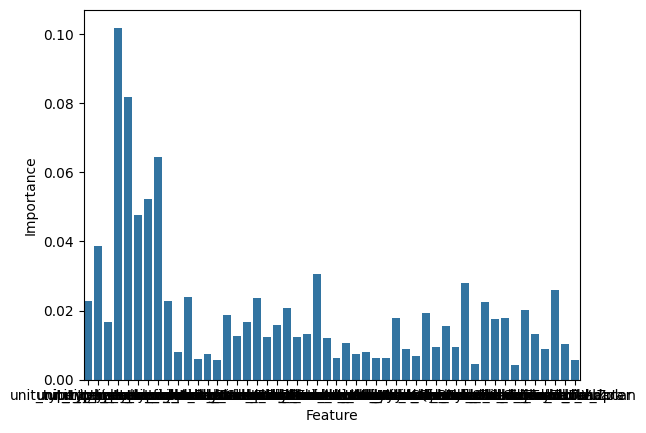

In [34]:
# Create Bar Plot
plot = sns.barplot(
    data= feature_importances,
    x= 'Feature',
    y= 'Importance')

In [35]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(clf, file)